In [1]:
import os

# The path to the data folder, adjusted to target the Voting subfolder
data_folder_path = '../data/Voting'
output_folder_path = '../data/VotingProcessed'  # Path to save processed files

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Loop through all files in the Voting folder
for file_name in os.listdir(data_folder_path):
    if file_name.endswith('.tab'):
        # Construct full paths to the input and output files
        input_file_path = os.path.join(data_folder_path, file_name)
        output_file_path = os.path.join(output_folder_path, f'cut_{file_name}')

        # Read the first 10,000 lines of the input file and write to the output file
        with open(input_file_path, 'r') as file_in, open(output_file_path, 'w') as file_out:
            for i in range(10000):  # Loop over the first 10000 lines
                line = file_in.readline()
                
                # If the file ends before reaching 10000 lines, break out of the loop
                if not line:
                    break
                
                file_out.write(line)

        print(f'Processed {file_name}')


FileNotFoundError: [Errno 2] No such file or directory: '../data/Voting'

In [2]:
import pandas as pd

# Load the first demographic file for preliminary EDA
file_path = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-DEMOGRAPHIC.tab'

# Since the file is a .tab, we assume it's tab-delimited
demographic_df = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows of the dataframe
demographic_df.head()

/var/folders/17/jvt64xhs0q5bg38bg51czhqc0000gn/T/ipykernel_76341/682862631.py:7: DtypeWarning: Columns (24,25,28,48,53,54,57,106,115,178,293,314,382,389,395,397,398,440,443,454) have mixed types. Specify dtype option on import or set low_memory=False.
  demographic_df = pd.read_csv(file_path, delimiter='\t')


,SEQUENCE,LALVOTERID,Voters_Active,Voters_StateVoterID,Voters_CountyVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_Landline7Digit,VoterTelephones_LandlineFormatted,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,...,ElectionReturns_P18PrecinctTurnoutAllRegisteredVoters,ElectionReturns_P18PrecinctTurnoutDemocrats,ElectionReturns_P18PrecinctTurnoutRepublicans,FECDonors_AvgDonation,FECDonors_AvgDonation_Range,FECDonors_LastDonationDate,FECDonors_NumberOfDonations,FECDonors_PrimaryRecipientOfContributions,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range
0,1,LALMA162002848,I,02TJH1046001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,LALMA528324496,I,02FLS1497000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,LALMA573296089,I,03RKN1001000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,LALMA161150467,I,06MKE0488004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LALMA442113039,I,12SLY1788001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/johnkim/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Demographic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 646 entries, SEQUENCE to FECDonors_TotalDonationsAmt_Range
dtypes: float64(279), int64(48), object(319)
memory usage: 49.3+ MB
None

Vote History Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 984 entries, LALVOTERID to BallotReturnDate_Primary_2010_09_14
dtypes: float64(633), int64(1), object(350)
memory usage: 75.1+ MB
None

Demographic Data Description:
           SEQUENCE      LALVOTERID Voters_Active Voters_StateVoterID  \
count   9999.000000            9999          9999                9999   
unique          NaN            9999             2                9999   
top             NaN  LALMA162002848             A        02TJH1046001   
freq            NaN               1          9150                   1   
mean    5000.000000             NaN           NaN                 NaN   
std     2886.607005             NaN           NaN 

            LALVOTERID Local_or_Municipal_2020_11_03 General_2020_11_03  \
count             9999                          1181               8231   
unique            9999                             1                  1   
top     LALMA162002848                             Y                  Y   
freq                 1                          1181               8231   
mean               NaN                           NaN                NaN   
std                NaN                           NaN                NaN   
min                NaN                           NaN                NaN   
25%                NaN                           NaN                NaN   
50%                NaN                           NaN                NaN   
75%                NaN                           NaN                NaN   
max                NaN                           NaN                NaN   

        Local_or_Municipal_2020_10_20  Local_or_Municipal_2020_10_17  \
count                      

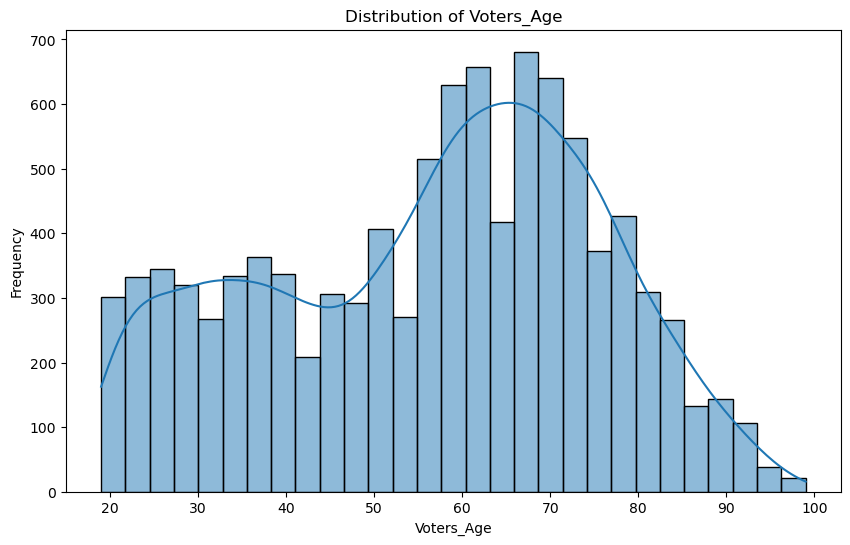

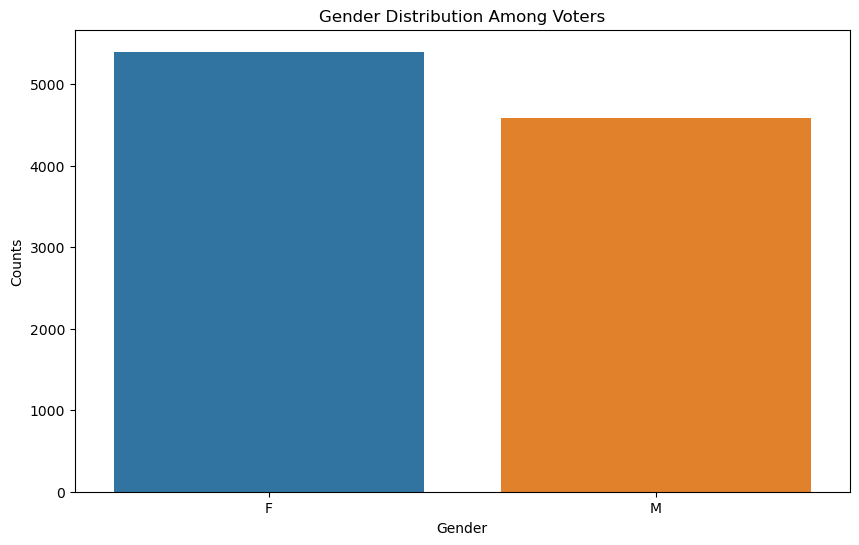

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
demographic_data_path = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-DEMOGRAPHIC.tab'  
vote_history_data_path = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-VOTEHISTORY.tab'  

demographic_data = pd.read_csv(demographic_data_path, sep='\t', low_memory=False)
vote_history_data = pd.read_csv(vote_history_data_path, sep='\t', low_memory=False)

# Basic Information
print("Demographic Data Info:")
print(demographic_data.info())
print("\nVote History Data Info:")
print(vote_history_data.info())

# Summary Statistics
print("\nDemographic Data Description:")
print(demographic_data.describe(include='all'))
print("\nVote History Data Description:")
print(vote_history_data.describe(include='all'))

# Data Cleaning 
demographic_data_clean = demographic_data.dropna(axis=1, thresh=int(0.5*len(demographic_data)))
vote_history_data_clean = vote_history_data.dropna(axis=1, thresh=int(0.5*len(vote_history_data)))

# Using identified columns for analysis
numeric_column_name = 'Voters_Age'
categorical_column_name = 'Voters_Gender'

# Visualizations
# Histogram of a selected numeric column from demographic data
plt.figure(figsize=(10, 6))
sns.histplot(demographic_data_clean[numeric_column_name].dropna(), kde=True)
plt.title(f"Distribution of {numeric_column_name}")
plt.xlabel(numeric_column_name)
plt.ylabel("Frequency")
plt.show()

# Bar plot of a selected categorical column from demographic data
plt.figure(figsize=(10, 6))
sns.countplot(x='Voters_Gender', data=demographic_data_clean)
plt.title("Gender Distribution Among Voters")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.show()


In [4]:
demographic_data.head()

# print(demographic_data.columns)
for f in demographic_data_clean.columns:
    print(f)

# interesting features: Residence_Addresses_City, Residence_Addresses_Zip, 
# Residence_Addresses_ApartmentType, Residence_Addresses_CensusBlock, 
# Ethnic_Description, County, City

SEQUENCE
LALVOTERID
Voters_Active
Voters_StateVoterID
Voters_FirstName
Voters_MiddleName
Voters_LastName
Residence_Addresses_AddressLine
Residence_Addresses_City
Residence_Addresses_State
Residence_Addresses_Zip
Residence_Addresses_ZipPlus4
Residence_Addresses_HouseNumber
Residence_Addresses_StreetName
Residence_Addresses_Designator
Residence_Addresses_CassErrStatCode
Voters_SequenceZigZag
Voters_SequenceOddEven
Residence_Addresses_CensusTract
Residence_Addresses_CensusBlockGroup
Residence_Addresses_CensusBlock
Residence_Addresses_Latitude
Residence_Addresses_Longitude
Residence_Addresses_LatLongAccuracy
Residence_Addresses_Property_LandSq_Footage
Residence_Addresses_Property_HomeSq_Footage
Residence_Addresses_Density
Residence_Families_FamilyID
Residence_Families_HHCount
Residence_HHGender_Description
Residence_HHParties_Description
Mailing_Addresses_AddressLine
Mailing_Addresses_City
Mailing_Addresses_State
Mailing_Addresses_Zip
Mailing_Addresses_ZipPlus4
Mailing_Addresses_HouseNumbe

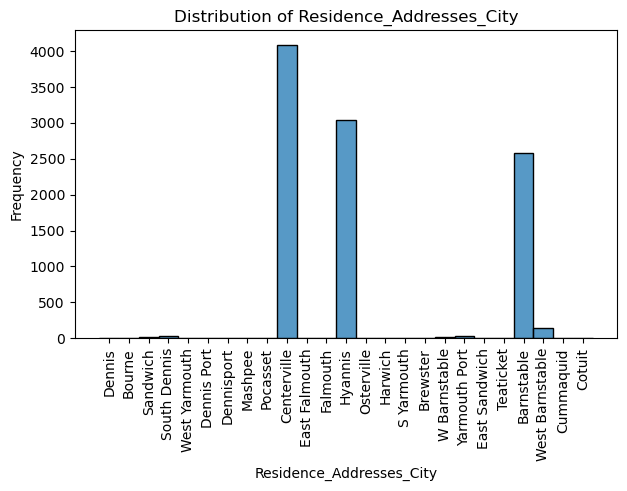

In [5]:
col = 'Residence_Addresses_City'
plt.figure(figsize=(7, 4))
sns.histplot(demographic_data_clean[col].dropna())
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

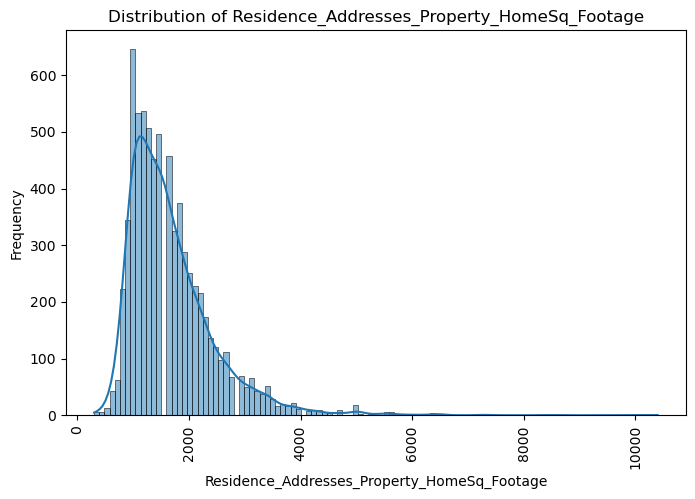

In [6]:
col = 'Residence_Addresses_Property_HomeSq_Footage'
plt.figure(figsize=(8, 5))
sns.histplot(demographic_data_clean[col].dropna(), kde=True)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

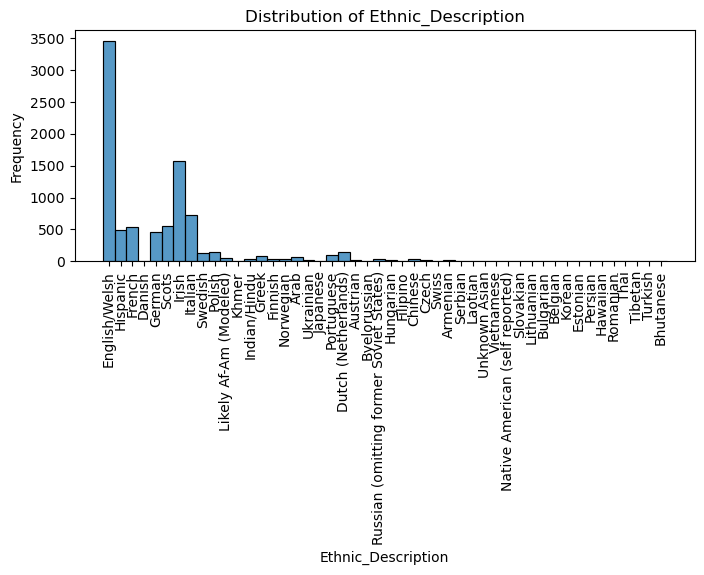

In [7]:
col = 'Ethnic_Description'
plt.figure(figsize=(8, 3))
sns.histplot(demographic_data_clean[col].dropna())
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

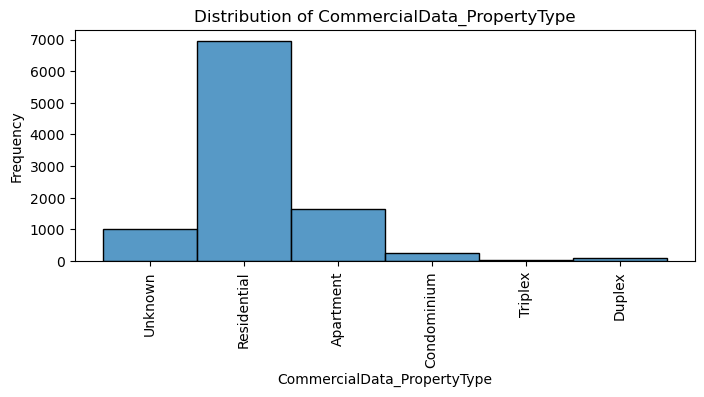

In [8]:
col = 'CommercialData_PropertyType'
plt.figure(figsize=(8, 3))
sns.histplot(demographic_data_clean[col].dropna())
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

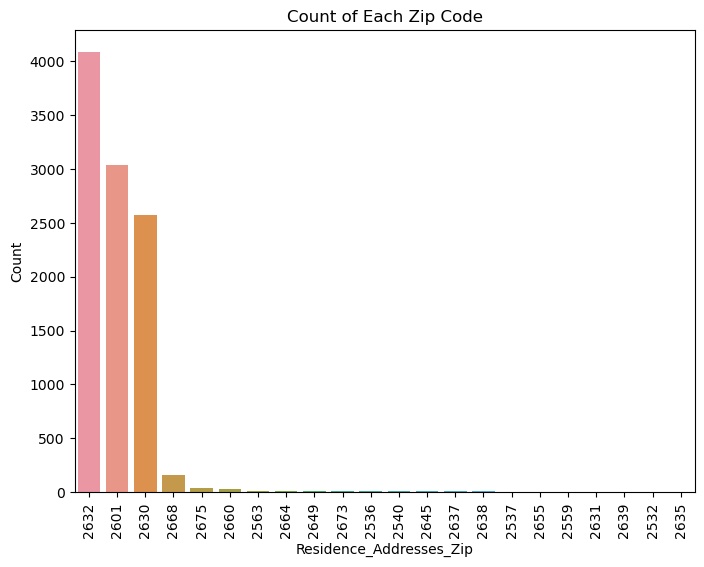

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_Addresses_Zip', data=demographic_data_clean, order=demographic_data_clean['Residence_Addresses_Zip'].value_counts().index)
plt.title('Count of Each Zip Code')
plt.xlabel('Residence_Addresses_Zip')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Load the first demographic file for preliminary EDA
file_path3 = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-VOTEHISTORY.tab'

# Since the file is a .tab, we assume it's tab-delimited
vote_df3 = pd.read_csv(file_path3, low_memory=False, delimiter='\t')

# Display the first few rows of the dataframe
vote_df3.head()

,LALVOTERID,Local_or_Municipal_2020_11_03,General_2020_11_03,Local_or_Municipal_2020_10_20,Local_or_Municipal_2020_10_17,Local_or_Municipal_2020_09_26,Local_or_Municipal_2020_09_12,Local_or_Municipal_2020_09_10,Local_or_Municipal_2020_09_01,Primary_2020_09_01,...,BallotReturnDate_General_2018_11_06,BallotReturnDate_Primary_2018_09_04,BallotReturnDate_General_2016_11_08,BallotReturnDate_Primary_2016_09_08,BallotReturnDate_General_2014_11_04,BallotReturnDate_Primary_2014_09_09,BallotReturnDate_General_2012_11_06,BallotReturnDate_Primary_2012_09_06,BallotReturnDate_General_2010_11_02,BallotReturnDate_Primary_2010_09_14
0,LALMA162002848,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LALMA528324496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LALMA573296089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LALMA161150467,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LALMA442113039,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# Load the first demographic file for preliminary EDA
file_path4 = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-DEMOGRAPHIC.tab'
#xdb - xdj 3543105-3929196
# Since the file is a .tab, we assume it's tab-delimited
demo_df4 = pd.read_csv(file_path4, low_memory=False,encoding='latin1', delimiter='\t')

column_name_to_find = 'FECDonors_AvgDonation'

# Get a list of all column names
all_columns = demo_df4.columns.tolist()

# Find the index of the desired column name
column_index = all_columns.index(column_name_to_find)

# Display the first few rows of the dataframe
demo_df4.head()

,SEQUENCE,LALVOTERID,Voters_Active,Voters_StateVoterID,Voters_CountyVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_Landline7Digit,VoterTelephones_LandlineFormatted,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,...,ElectionReturns_P18PrecinctTurnoutAllRegisteredVoters,ElectionReturns_P18PrecinctTurnoutDemocrats,ElectionReturns_P18PrecinctTurnoutRepublicans,FECDonors_AvgDonation,FECDonors_AvgDonation_Range,FECDonors_LastDonationDate,FECDonors_NumberOfDonations,FECDonors_PrimaryRecipientOfContributions,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range
0,1,LALMA162002848,I,02TJH1046001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,LALMA528324496,I,02FLS1497000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,LALMA573296089,I,03RKN1001000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,LALMA161150467,I,06MKE0488004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LALMA442113039,I,12SLY1788001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


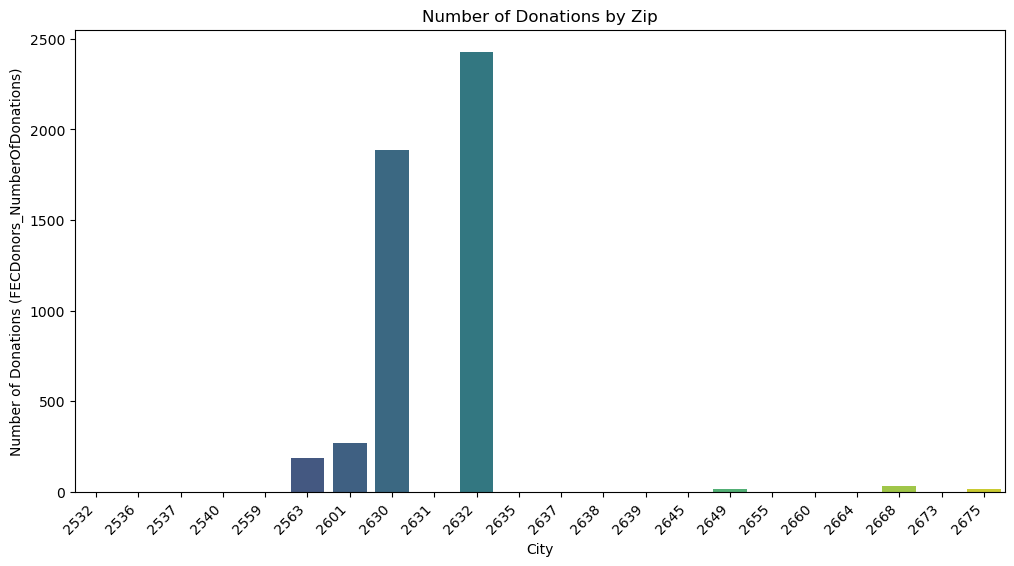

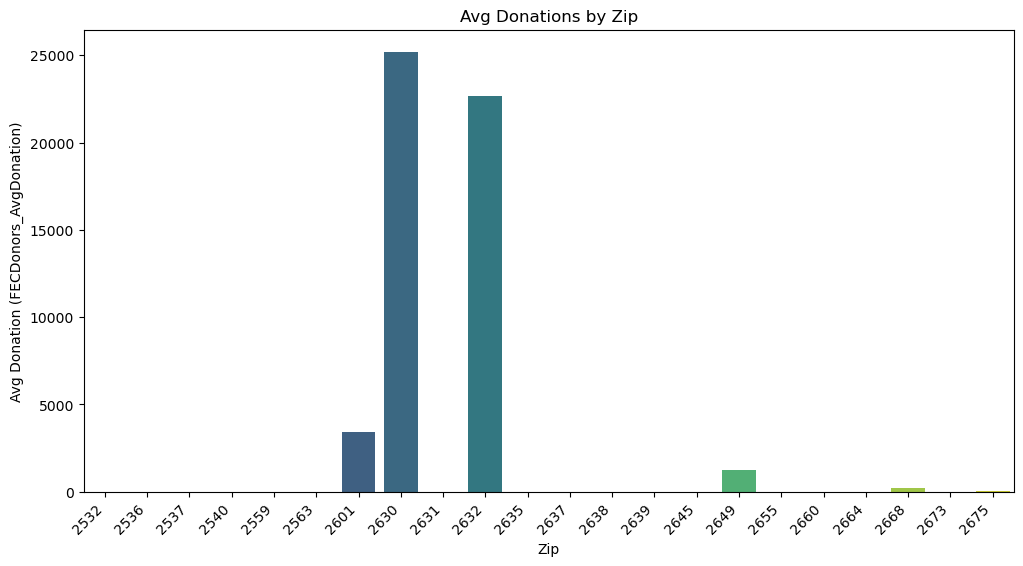

In [20]:
total_donations_by_zip = demo_df4.groupby('Residence_Addresses_Zip')['FECDonors_NumberOfDonations'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Residence_Addresses_Zip', y='FECDonors_NumberOfDonations', data=total_donations_by_zip, palette='viridis')
plt.title('Number of Donations by Zip')
plt.xlabel('City')
plt.ylabel('Number of Donations (FECDonors_NumberOfDonations)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

avg_donations_by_zip = demo_df4.groupby('Residence_Addresses_Zip')['FECDonors_AvgDonation'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Residence_Addresses_Zip', y='FECDonors_AvgDonation', data=avg_donations_by_zip, palette='viridis')
plt.title('Avg Donations by Zip')
plt.xlabel('Zip')
plt.ylabel('Avg Donation (FECDonors_AvgDonation)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [21]:
#Finding Boston Zipcodes
zipcodes = [2108, 2109, 2110, 2111, 2113, 2114, 2115, 2116, 2118, 2119, 2120, 2121, 2122, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2134, 2135, 2136, 2163, 2199, 2203, 2210, 2215]
ci = demo_df4['Mailing_Addresses_City'].drop_duplicates()
print(ci)


0              Dennis
3              Bourne
4            Sandwich
6        South Dennis
12      West Yarmouth
            ...      
9418          Boulder
9591         Moretown
9600     E Providence
9779           Denver
9823          Bristol
Name: Mailing_Addresses_City, Length: 83, dtype: object


In [33]:
import pandas as pd

threshold = 0.03  # You can adjust this threshold as needed, higher would mean less results
# Convert each CSV file to a Dataframe.
data_chunk_1 = pd.read_csv("../data/permits_1_data.csv")
data_chunk_2 = pd.read_csv("../data/permits_2_data.csv")
data_chunk_3 = pd.read_csv("../data/permits_3_data.csv")
permits = pd.concat([data_chunk_1, data_chunk_2, data_chunk_3], ignore_index=True)
permits_zip_ratio = permits['zip'].value_counts(normalize=True)
high_ratio_permits_zips = permits_zip_ratio[permits_zip_ratio > threshold]
print("Zip codes that represent more than 3% of permits")
print(high_ratio_permits_zips)


/var/folders/17/jvt64xhs0q5bg38bg51czhqc0000gn/T/ipykernel_76341/4017990386.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_chunk_1 = pd.read_csv("../data/permits_1_data.csv")
/var/folders/17/jvt64xhs0q5bg38bg51czhqc0000gn/T/ipykernel_76341/4017990386.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_chunk_2 = pd.read_csv("../data/permits_2_data.csv")


Zip codes that represent more than 3% of permits
2116.0    0.066964
2130.0    0.049956
2124.0    0.048230
2127.0    0.046059
2115.0    0.041995
2131.0    0.040908
2132.0    0.039324
2128.0    0.038919
2118.0    0.037824
2135.0    0.036068
2125.0    0.031930
2110.0    0.031772
2136.0    0.031694
2114.0    0.030420
2119.0    0.030383
Name: zip, dtype: float64


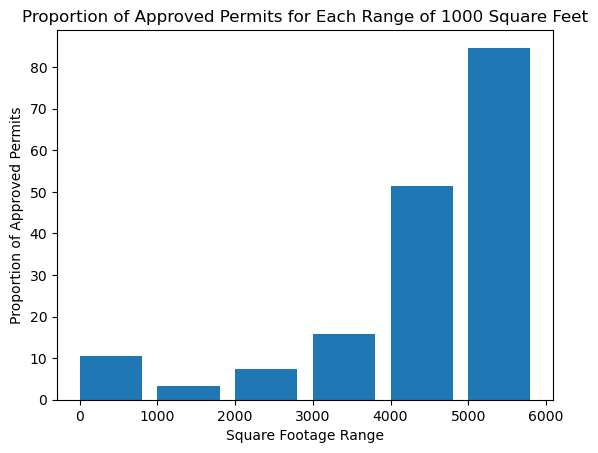

In [34]:
col = 'Residence_Addresses_Property_HomeSq_Footage'
all_sq_feet = demographic_data_clean[col]
approved_sq_feet = permits['sq_feet']

bin_ranges = range(0, 7000, 1000)

permits_grouped = approved_sq_feet.groupby(pd.cut(approved_sq_feet, bin_ranges)).count()
voter_grouped = all_sq_feet.groupby(pd.cut(all_sq_feet, bin_ranges)).count()

proportion_approved = permits_grouped / voter_grouped

plt.bar(bin_ranges[:-1], proportion_approved, width=800, align='edge')
plt.xlabel('Square Footage Range')
plt.ylabel('Proportion of Approved Permits')
plt.title('Proportion of Approved Permits for Each Range of 1000 Square Feet')
plt.show()

In [35]:
col = 'CommercialData_EstHomeValue'
all_value = demographic_data_clean[col].astype(str)
all_value = all_value.apply(lambda x: float(x.replace('$', '').replace(',', '')))
print(all_value)

0       480131.0
1       480131.0
2       480131.0
3       386259.0
4            NaN
          ...   
9994    669346.0
9995    549217.0
9996    549217.0
9997    528301.0
9998    625000.0
Name: CommercialData_EstHomeValue, Length: 9999, dtype: float64


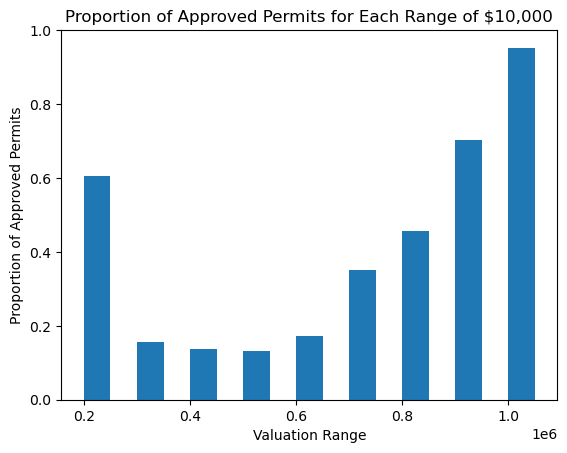

In [36]:
col = 'CommercialData_EstHomeValue'
all_value = demographic_data_clean[col].astype(str)
all_value = all_value.apply(lambda x: float(x.replace('$', '').replace(',', '')))
approved_value = permits['declared_valuation']
approved_value = approved_value.apply(lambda x: float(x.replace('$', '').replace(',', '')))

bin_ranges = range(200000, 1200000, 100000)

permits_grouped = approved_value.groupby(pd.cut(approved_value, bin_ranges)).count()
voter_grouped = all_value.groupby(pd.cut(all_value, bin_ranges)).count()*15

proportion_approved = permits_grouped / voter_grouped

plt.bar(bin_ranges[:-1], proportion_approved, width=50000, align='edge')
plt.xlabel('Valuation Range')
plt.ylabel('Proportion of Approved Permits')
plt.title('Proportion of Approved Permits for Each Range of $10,000')
plt.show()

In [200]:
file_path_boston =  '../data/VotingProcessed/boston_vote_file.csv'
file_path_boston1 = '../data/VotingProcessed/boston_voter_file1.csv'
file_path_boston2 = '../data/VotingProcessed/boston_voter_file2.csv'
file_path_boston3 = '../data/VotingProcessed/boston_voter_file3.csv'
file_path_boston4 = '../data/VotingProcessed/boston_voter_file4.csv'
file_path_boston5 = '../data/VotingProcessed/boston_voter_file5.csv'
file_path_boston6 = '../data/VotingProcessed/boston_voter_file6.csv'

df_boston = pd.read_csv(file_path_boston, low_memory=False, encoding='latin1', delimiter='\t', header=None, skiprows=2)
df_boston1 = pd.read_csv(file_path_boston1, low_memory=False, encoding='latin1', delimiter='\t', header=None, skiprows=2)

#df_boston1 = pd.read_csv(file_path_boston1, low_memory=False,encoding='latin1', delimiter='\t')
df_boston2 = pd.read_csv(file_path_boston2, low_memory=False,encoding='latin1', delimiter='\t')
df_boston3 = pd.read_csv(file_path_boston3, low_memory=False,encoding='latin1', delimiter='\t')
df_boston4 = pd.read_csv(file_path_boston4, low_memory=False,encoding='latin1', delimiter='\t')
df_boston5 = pd.read_csv(file_path_boston5, low_memory=False,encoding='latin1', delimiter='\t')
df_boston6 = pd.read_csv(file_path_boston6, low_memory=False,encoding='latin1', delimiter='\t')

In [156]:
df_boston.head()
#print(df_boston.describe(include='all'))

,0,1,2,3,4,5,6,7,8,9,...,685,686,687,688,689,690,691,692,693,694
0,3681226,LALMA552674318,I,07WDS2289000,NaN,NaN,NaN,NaN,NaN,NaN,...,36%,49%,11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3681227,LALMA161437000,A,09SJA3093000,NaN,NaN,NaN,NaN,NaN,NaN,...,36%,49%,11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3681228,LALMA552629768,A,09HLY2900000,NaN,NaN,NaN,NaN,NaN,NaN,...,36%,49%,11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3681229,LALMA573298481,I,05CAY3191000,NaN,NaN,NaN,NaN,NaN,NaN,...,36%,49%,11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3681230,LALMA160622378,I,12TNE1375002,NaN,NaN,NaN,NaN,NaN,NaN,...,36%,49%,11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


639


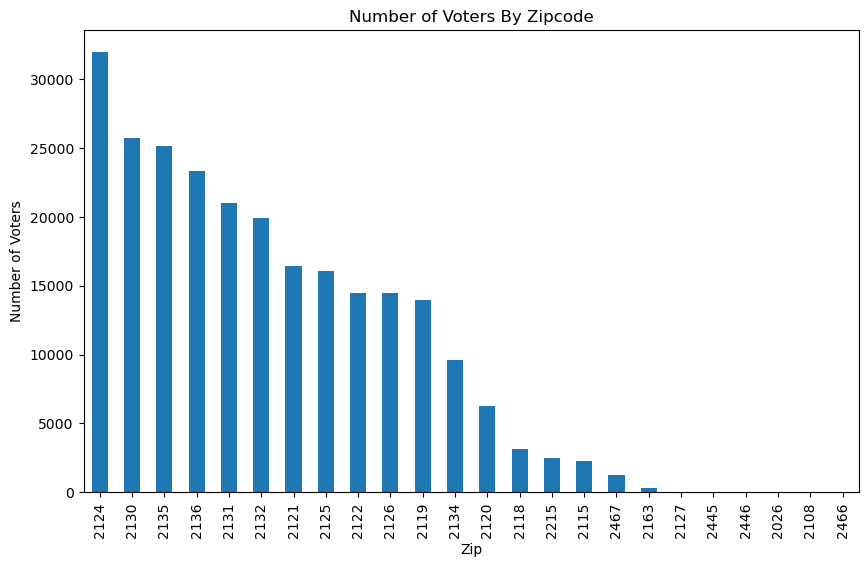

In [171]:
print(column_index)

column_21_index = 22

zip_code_counts = df_boston.iloc[:, column_21_index].value_counts()

zip_code_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Zip')
plt.ylabel('Number of Voters')
plt.title('Number of Voters By Zipcode')
plt.show()

In [183]:
df_boston[48] #political party
df_boston[76] #race
df_boston[22] #zipcode



0         2118
1         2118
2         2118
3         2118
4         2118
          ... 
247965    2135
247966    2135
247967    2135
247968    2135
247969    2135
Name: 22, Length: 247970, dtype: int64

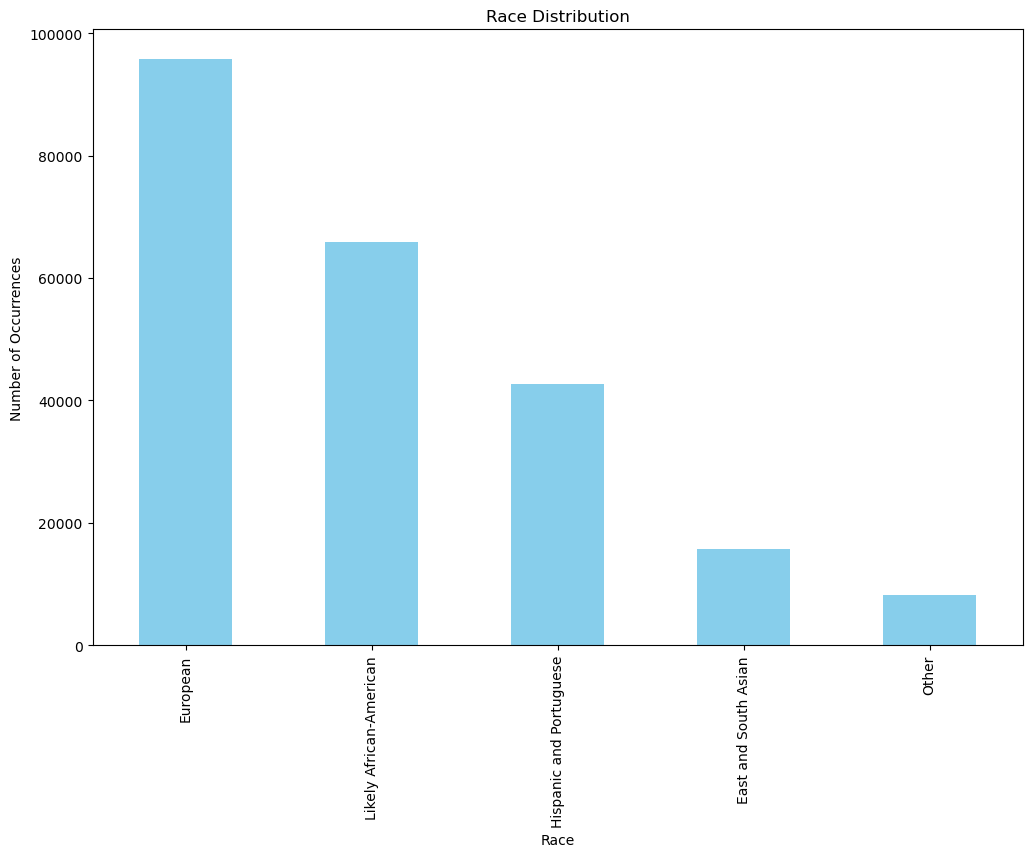

In [205]:
party_column_index = 76

# Count occurrences of each political party
party_counts = df_boston.iloc[:, party_column_index].value_counts()

# Plotting a vertical bar chart
party_counts.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Number of Occurrences')

plt.show()